# Importing libraries

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
from plotly import graph_objs as go
from plotly import express as px
from plotly import offline
import warnings
warnings.filterwarnings("ignore")

# Importing and reading dataset

In [191]:
#import data set from flat files (.csv files) and store it as a dataframe
lung_cc_df = pd.read_csv('/Users/angelazollo/Desktop/survey_lung_cancer.csv')

#look at formatting of entries
lung_cc_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Understanding the data

In [192]:
#What is the shape of the dataset?
lung_cc_df.shape

(309, 16)

In [193]:
#showing info about the attributes and dataype of the dataframe
lung_cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [194]:
#checimg for null values
lung_cc_df.isnull().sum()   #no missing values 

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [195]:
#analysis on the numerical columns
lung_cc_df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


#From this we can gather that (looking mostly at the mean values)
AGE: mean and meadinan age is around 62 years old, so data is moslty about elderly people are 
SMOKING: we can observe that dataset is mostly about smokers 
YELLOW_FINGERS: most people have yellow fingers
ANXIETY/PEER_PRESSURe/CHRONIC_DISEASE: dataset is balanced
FATIGUE/ALLERGY/WHEEZING/ALCOHOL CONSUMING/COUGHING/SHORTNESS OF BREATH: most people reporting these sympthoms
SWALLOWING DIFFICULTY:most people DO NOT have swallowing difficulty 
CHEST PAIN: most people have this sympthom

In [196]:
#checking for duplicates
print(f'Total duplicated rows:{lung_cc_df.duplicated().sum()}') 

Total duplicated rows:33


In [197]:
#we have 33 duplicates, let's drop them 
lung_cc_df.drop_duplicates(inplace = True)
lung_cc_df.shape

(276, 16)

Now we have 276 rows compared to the 309 we started with

# EDA - Exploratory Data Analysis

In [198]:
#changing the column title using .title method for symplifying my coding 
lung_cc_df.columns = lung_cc_df.columns.str.title()

In [199]:
#changing numeric values into categorical values for better visualisation
#using .replace method
lung_cc_df["Gender"] = lung_cc_df["Gender"].replace(["M","F"],["Male","Female"])

#creating a list
col = ["Smoking","Yellow_Fingers","Anxiety","Peer_Pressure","Chronic Disease",
       "Fatigue ","Allergy ","Wheezing","Alcohol Consuming","Coughing","Shortness Of Breath",
       "Swallowing Difficulty","Chest Pain"]

#iterating over the list using for loop
for x in col:
        lung_cc_df[x] = lung_cc_df[x].replace([1,2],["No","Yes"])
 
lung_cc_df.sample(5)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
263,Female,71,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
271,Male,63,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,YES
86,Male,66,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,YES
259,Male,58,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,YES
239,Female,75,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,YES


Gender analysis

In [200]:
#checking what genders are captured in the dataset
lung_cc_df['Gender'].unique()  #2 genders

array(['Male', 'Female'], dtype=object)

In [201]:
#counting distribution of gender
gender_type = lung_cc_df['Gender'].value_counts(sort = True)
gender_type

Male      142
Female    134
Name: Gender, dtype: int64

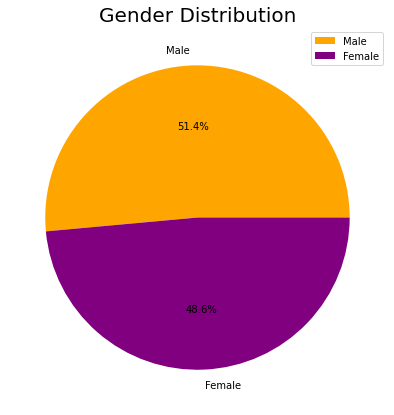

In [202]:
#creating a pie chart with matplotlib 
fig, ax = plt.subplots(figsize =(10, 7))
y = np.array([142, 134])
mylabels = ['Male', 'Female']
colors = ('orange', 'purple')

plt.pie(y, labels = mylabels, autopct='%1.1f%%', colors = colors)
plt.legend()
plt.title('Gender Distribution', fontsize = 20)
plt.show()

The dataset contains more info related to male individuals

In [203]:
#indexing data to get relevant info using also boolean operators
smoking_vs_gender = lung_cc_df[['Gender', 'Smoking']]
smoking_vs_gender = smoking_vs_gender[smoking_vs_gender['Smoking'] == 'Yes']
smoking_vs_gender = smoking_vs_gender['Gender'].value_counts(sort = True)
smoking_vs_gender

Male      80
Female    70
Name: Gender, dtype: int64

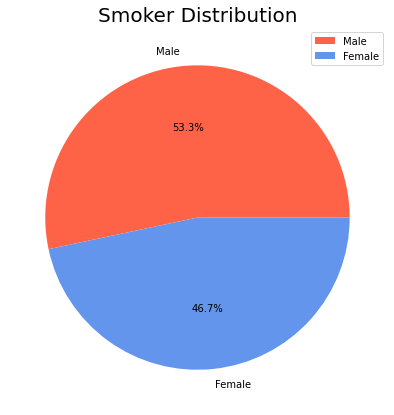

In [204]:
#creating a pie chart with matplotlib 
fig, ax = plt.subplots(figsize =(10, 7))
y = np.array([80, 70])
mylabels = ['Male', 'Female']
colors = ('tomato', 'cornflowerblue')

plt.pie(y, labels = mylabels, autopct='%1.1f%%', colors = colors)
plt.legend()
plt.title('Smoker Distribution', fontsize = 20)
plt.show()

Males represents the majority of smokers

In [205]:
#creating a dataframe where only smoker are present using boolean operators
smoker_df = lung_cc_df[lung_cc_df['Smoking'] == 'Yes'] 
smoker_df

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES
8,Female,68,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Male,56,Yes,No,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,YES
276,Female,62,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,YES
278,Female,77,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,YES
280,Female,59,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,No,No,NO


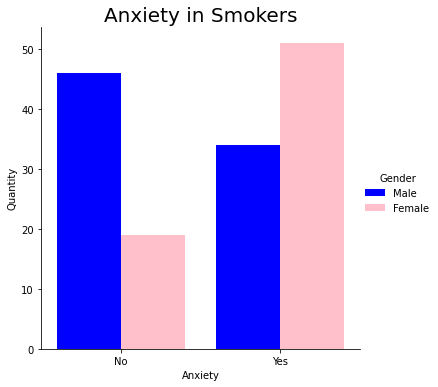

In [206]:
#plotting a graph to check what is the gender distribution of anxiety in smokers 
p = sns.catplot(data = smoker_df, x = 'Anxiety', hue = 'Gender', kind = 'count',
              hue_order = ['Male', 'Female'], palette = ['blue', 'pink'], saturation = 1)
plt.title('Anxiety in Smokers', fontsize = 20)
plt.ylabel('Quantity')
plt.show()

Female smokers are more anxious than male smokers

In [207]:
#using the method .crosstab() reshaping the data for better visualisation 
plot = pd.crosstab(lung_cc_df['Smoking'], lung_cc_df['Anxiety'])
plot

Anxiety,No,Yes
Smoking,,
No,74,52
Yes,65,85


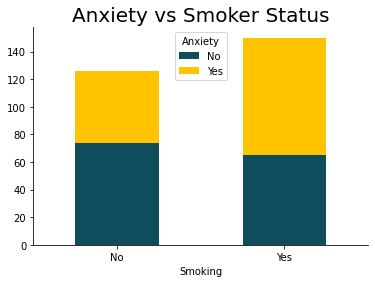

In [208]:
#creating a plot with matplotlib 
pl = plot.plot(kind='bar', stacked = True,rot =0, color = ['#0f4c5c', '#FFC300'])
plt.legend(loc = 'upper center', title = 'Anxiety')
plt.title(label = 'Anxiety vs Smoker Status', fontsize = 20)
  
# Iterating over right and top axis and make the Spines Visibility as False
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

Smoker are more anxious people

In [209]:
#creating a data set of only positive lung cancer cases 
positive_cases = lung_cc_df[lung_cc_df['Lung_Cancer'] == 'YES']
positive_cases.head()

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


In [210]:
#indexing dataframe to select only relevant columns for the analysis
positive_cases_vs_gender = positive_cases.loc[:,['Gender', 'Lung_Cancer']]
positive_cases_vs_gender

,Gender,Lung_Cancer
0,Male,YES
1,Male,YES
5,Female,YES
6,Male,YES
7,Female,YES
...,...,...
274,Male,YES
276,Female,YES
278,Female,YES
279,Female,YES


In [211]:
#counting distribution of gender per positive cases of lung cancer
positive_cases_vs_gender = positive_cases_vs_gender['Gender'].value_counts(sort = True)
positive_cases_vs_gender

Male      125
Female    113
Name: Gender, dtype: int64

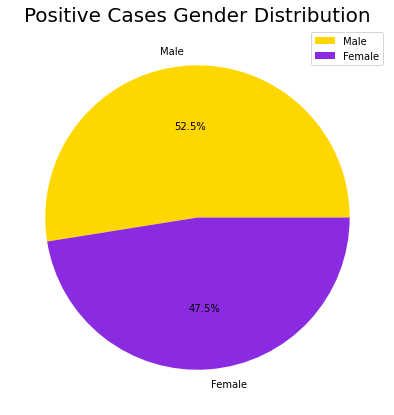

In [212]:
#creating a pie chart with matplotlib
fig, ax = plt.subplots(figsize =(10, 7))
y = np.array([125, 113])
mylabels = ['Male', 'Female']
colors = ('gold', 'blueviolet')

plt.pie(y, labels = mylabels, autopct='%1.1f%%', colors = colors)
plt.legend()
plt.title('Positive Cases Gender Distribution', fontsize = 20)
plt.show()

Male individuals are more impacted by lung cancer

Finding out minimun and maximum age of lung cancer patients

In [213]:
#indexing dataframe to select only relevant columns for the analysis
positive_cases_vs_age = positive_cases[['Age', 'Gender', 'Lung_Cancer']]
positive_cases_vs_age

,Age,Gender,Lung_Cancer
0,69,Male,YES
1,74,Male,YES
5,75,Female,YES
6,52,Male,YES
7,51,Female,YES
...,...,...,...
274,56,Male,YES
276,62,Female,YES
278,77,Female,YES
279,59,Female,YES


[Text(0.5, 1.0, 'Age distribution of lung cancer')]

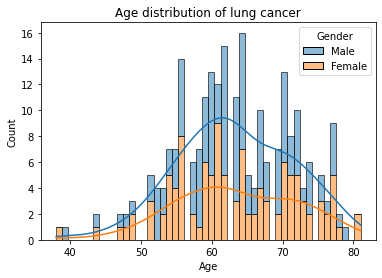

In [214]:
#using seaborn library to plot age ditribution for positive cases of lung cancer
sns.histplot(data = positive_cases_vs_age, x = 'Age', hue = 'Gender', 
             multiple = 'stack', kde = True, bins=50).set(title = 'Age distribution of lung cancer')

In [215]:
print('The minimum age of a lung cancer patient is : ', positive_cases_vs_age['Age'].min())
print('The maximum age of a lung cancer patient is : ', positive_cases_vs_age['Age'].max())
print('The average age for a lung cancer patient is:', round(positive_cases_vs_age['Age'].mean()))

The minimun age of a lung cancer patient is :  38
The maximum age of a lung cancer patient is :  81
The average age for a lung cancer patient is: 63


In [216]:
#using .groupby fuction to analyse age and gender relations
age_gen_rel = positive_cases_vs_age.groupby(["Gender","Lung_Cancer"]).agg(total_cancer = ('Lung_Cancer','count'),\
                                                              minimum_age = ('Age','min'),
                                                              maximum_age = ('Age','max'),
                                                              avg_age = ('Age', 'mean')).round().reset_index()
age_gen_rel

,Gender,Lung_Cancer,total_cancer,minimum_age,maximum_age,avg_age
0,Female,YES,113,38,81,63.0
1,Male,YES,125,39,79,63.0


In [217]:
#indexing dataframe to select only relevant columns for the analysis by using most common symptoms 
symptoms = positive_cases.iloc[:, [6,7,9,11,12,13,14]]
symptoms

,Chronic Disease,Fatigue,Wheezing,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain
0,No,Yes,Yes,Yes,Yes,Yes,Yes
1,Yes,Yes,No,No,Yes,Yes,Yes
5,Yes,Yes,Yes,Yes,Yes,No,No
6,No,Yes,Yes,Yes,Yes,No,Yes
7,No,Yes,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
274,Yes,No,Yes,Yes,Yes,No,Yes
276,Yes,Yes,No,Yes,Yes,No,No
278,Yes,Yes,No,No,Yes,Yes,No
279,No,No,Yes,Yes,No,Yes,No


In [218]:
#using melt() fuction to shape the data for better analysis
symptoms = symptoms.melt(var_name = 'Symptoms', value_name = 'Present') 
symptoms

,Symptoms,Present
0,Chronic Disease,No
1,Chronic Disease,Yes
2,Chronic Disease,Yes
3,Chronic Disease,No
4,Chronic Disease,No
...,...,...
1661,Chest Pain,Yes
1662,Chest Pain,No
1663,Chest Pain,No
1664,Chest Pain,No


In [219]:
#getting only symptoms that are presents in lung cancer patients using boolean operators
pos_symptoms = symptoms[symptoms['Present'] == 'Yes']
pos_symptoms

,Symptoms,Present
1,Chronic Disease,Yes
2,Chronic Disease,Yes
5,Chronic Disease,Yes
6,Chronic Disease,Yes
7,Chronic Disease,Yes
...,...,...
1656,Chest Pain,Yes
1658,Chest Pain,Yes
1659,Chest Pain,Yes
1661,Chest Pain,Yes


In [220]:
#counting the most popular symptoms
cancer_symptoms = pos_symptoms['Symptoms'].value_counts(ascending = True)
cancer_symptoms

Swallowing Difficulty    124
Chronic Disease          131
Wheezing                 142
Chest Pain               142
Coughing                 149
Shortness Of Breath      153
Fatigue                  165
Name: Symptoms, dtype: int64

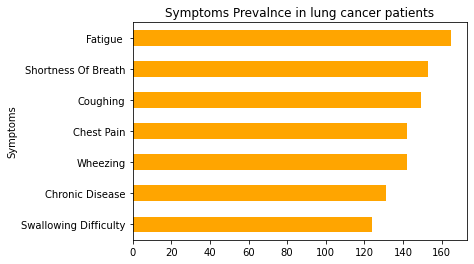

In [221]:
#visualising most common symptoms in cancer patients
cc_s = cancer_symptoms.plot(kind = 'barh', title = 'Symptoms Prevalnce in lung cancer patients', 
                            ylabel = 'Symptoms occurance', xlabel = 'Symptoms', color = 'orange')

plt.show()

Most common symptom is Fatigues, very close by Shortness of Breath and the least common is Swallowing Difficulty

# Machine Learning

Using my first dataframe I will change all categorical values to number to be able to perfom the machine learning code

In [222]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

lung_cc_df['Lung_Cancer'] = LabelEncoder.fit_transform(lung_cc_df['Lung_Cancer'])
lung_cc_df

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,1
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,1
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,0
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,0
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Female,59,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,1
280,Female,59,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,No,No,0
281,Male,55,Yes,No,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,0
282,Male,46,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,Yes,0


In [223]:
#using one-hot-encode to avoid gender bias and improve ml performaces
lung_cc_df = pd.get_dummies(lung_cc_df, columns= ['Gender']) 
lung_cc_df

,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer,Gender_Female,Gender_Male
0,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,1,0,1
1,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,1,0,1
2,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,0,1,0
3,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,0,0,1
4,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,1,1,0
280,59,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,No,No,0,1,0
281,55,Yes,No,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,0,0,1
282,46,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,Yes,0,0,1


In [224]:
#renaming columns to better refeclt the changes og the gender column
lung_cc_df.rename(columns = {'Gender_Male' : 'Male', 'Gender_Female' : 'Female'}, inplace=True)
col_2 = ["Yellow_Fingers","Anxiety","Peer_Pressure","Chronic Disease",
       "Fatigue ","Allergy ","Wheezing","Alcohol Consuming","Coughing","Shortness Of Breath",
       "Swallowing Difficulty","Chest Pain"]
#changing the order of columns 
lung_cc_df = lung_cc_df[['Age', 'Male', 'Female','Alcohol Consuming', 'Chest Pain', 'Shortness Of Breath',
                         'Coughing', 'Peer_Pressure', 'Chronic Disease', 'Swallowing Difficulty',
                         'Yellow_Fingers','Anxiety','Fatigue ', 'Allergy ', 'Wheezing', 'Lung_Cancer']]

In [225]:
#replacing with for loop categorical values in numerical values 
for x in col_2:
        lung_cc_df[x] = lung_cc_df[x].replace(["No","Yes"], [1,2])
lung_cc_df.head()

,Age,Male,Female,Alcohol Consuming,Chest Pain,Shortness Of Breath,Coughing,Peer_Pressure,Chronic Disease,Swallowing Difficulty,Yellow_Fingers,Anxiety,Fatigue,Allergy,Wheezing,Lung_Cancer
0,69,1,0,2,2,2,2,1,1,2,2,2,2,1,2,1
1,74,1,0,1,2,2,1,1,2,2,1,1,2,2,1,1
2,59,0,1,1,2,2,2,2,1,1,1,1,2,1,2,0
3,63,1,0,2,2,1,1,1,1,2,2,2,1,1,1,0
4,63,0,1,1,1,2,2,1,1,1,2,1,1,1,2,0


<AxesSubplot:title={'center':'Correlation of features'}>

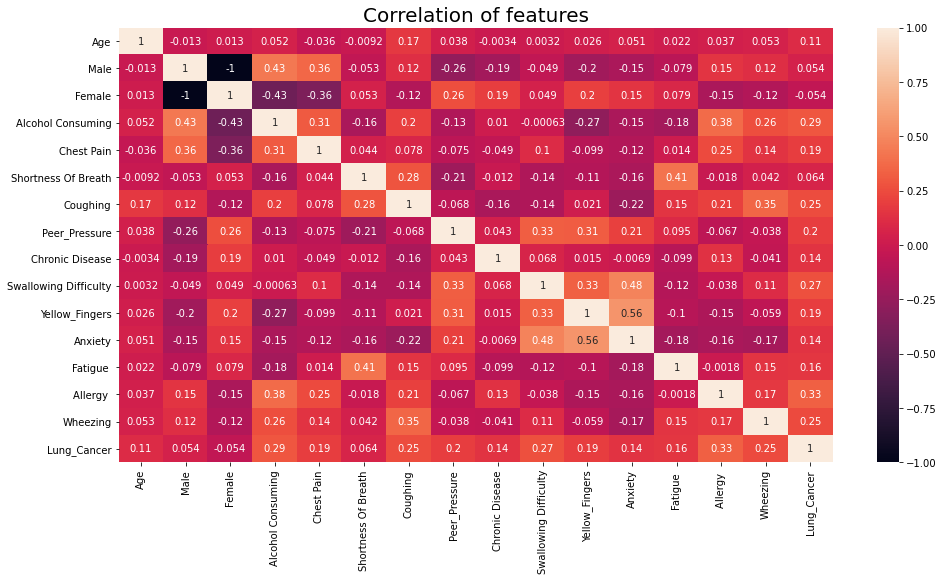

In [226]:
#plotting correlation for machine learning using seaborn heatmap

corr = lung_cc_df.corr()
f, ax = plt.subplots(figsize=(16,8))
plt.title('Correlation of features', fontsize = 20)
sns.heatmap(corr, annot = True)

In [227]:
#creating arrays for the model to use as input

x = lung_cc_df.drop(['Lung_Cancer'], axis = 1)
y = lung_cc_df['Lung_Cancer']

In [228]:
#spiltting dataset into training data and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [229]:
#training the model with Support Vector Machine 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm = SVC(C = 100, gamma = 10)
svm.fit(x_train, y_train)

#testign the model
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
#calculating accuracy scores
svm_acc = round(accuracy_score(y_test, svm_pred)*100)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 0  7]
 [ 0 76]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.92      1.00      0.96        76

    accuracy                           0.92        83
   macro avg       0.46      0.50      0.48        83
weighted avg       0.84      0.92      0.88        83


The Accuracy of Support Vector Machine is 92 %


In [237]:
#generating random numeric boolean to have patient data 
import random
def rand():
    age = random.randint(38,81)
    p_data = random.choices([1, 0], k = 15)
    p_data.insert(0, age)
    p_data = np.asarray(p_data)
    return p_data

p_data = rand()
p_data


array([53,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0,  0])

In [238]:
def diagnosis(svm_pred):
    if (svm_pred[15] == 0):
        print('This patient does NOT have cancer!')
    else:
        print('This patient HAS Cancer, they require medical attention')

In [239]:
diagnosis(p_data)   

This patient does NOT have cancer!


In [244]:
p_2_data = rand()
diagnosis(p_2_data)

This patient HAS Cancer, they require medical attention


In [245]:
p_3_data = rand()
diagnosis(p_3_data)

This patient HAS Cancer, they require medical attention


In [246]:
p_4_data = rand()
diagnosis(p_4_data)

This patient does NOT have cancer!
